## <span style="font-family:Calibri; color:blue; font-size:3em;">Grid Search Algorithms</span>

## <font color='navy'> Motivation
<font color='crimson'>Why we need "grid search" algorithms?</font>

We may consider the fact that almost all models in Machine Learning require specific hyperparameters:

<figure>
<center>
<img src='https://i.imgur.com/Ok4y9Wu.png'
width='500px' />
<figcaption>Example</figcaption></center>
</figure>

<font color='red' size=4pt>**CRITICAL THINKING**: Why aren't we testing all possible choices/values for the hyperparameters?</font>

<font color='red' size=4pt> **CRITICAL THINKING**: Why not just use gradient descent to determine the best choice of hyperparameters? </font>

<font color='blue' size=4pt>IMPORTANT: We may rarely be able to compute gradients of the prediction error with respect to the *hyper*parameters.</font>

Also, in general, we deal with a problem of non-convex optimization and just finding a local minima is not good enough; also cannot easily compute the direction (gradient) for improving the hyperparameters that we try to optimize.

<font color='green' size = 4pt>**SOLUTION**:



*   Subdivide the ranges of hyperparameters in grids (if they are numerical, eaqually spaced values)
*   Initialize the hyperparameters with a random choice
*   Evaluate the prediction error with this choice
*   Update the hyperparameters with a *procedure* that includes *good heuristics*
*   Test the new choice
*   Repeat the previously two steps until there is no more distinguishable progress relative to a tolerance value. </font>




We can use algorithms that do not require the gradient of the objective function in order to estimate the value for the *hyperparameters* and thus complete the *model selection* process.

A *Grid Search* will involve subdividing the range of the hyperparameters by using small increments and then the grid search algorithm is choosing the value of the parameters from a finite set of choices within the range.

The simplest *grid search algorithm* is an exhaustive search, namely loop through all the candidates and pick the one that is the *best* according to predefined criteria, such as minimizing the k-fold cross-validated loss or maximizing the accuracy, etc.

<span style="font-family:Calibri; color:DodgerBlue; font-size:14pt;">Important:</span> In practice we cannot search all the points in a multi-dimensional grid, it is computationally too expensive. We need a strategy that efficiently approximates the solution.

**Example**: Assume that we want to determine the best tree depth *and* the best leaf size for a classification tree. The following image color-codes the values of the cost function based on the grid values.



<figure>
<center>
<img src='https://i.imgur.com/DJfuQo3.png'
width='500px' />
<figcaption>Example of a Grid</figcaption></center>
</figure>

<span style="font-family:Calibri; color:DeepPink; font-size:14pt;">Critical Thinking Question:</span> If we compute the cost function at some random point on the grid how do we know in what direction we can continue to search for improving (lowering) the value of the cost function?



<figure>
<center>
<img src='https://i.imgur.com/XntHvsV.png'
width='500px' />
<figcaption>Example of a Grid</figcaption></center>
</figure>



## <font color='navy'> Genetic Algorithms



<figure>
<center>
<img src='https://i.imgur.com/ABBewO5.png'
width='400px' />
<figcaption>Genetic Algorithm</figcaption></center>
</figure>

### **Evaluation**

We compute the value of the ouput at each individual form the population and we ranked the individuals.

### **Selection**

In order to create a parent we draw a random subset from the population and pick the most "fit" individual. Once we obtain two parents we can applying the *crossover* and *mutation* procedures for generating children.

### **Crossover**

Typically we implement a two-point crossover. If the grid is 2-D we consider a crossover procedure illustrated below:



<figure>
<center>
<img src='https://i.imgur.com/RFNvn5a.png'
width='400px' />
<figcaption>Two-point crossover in 2-D</figcaption></center>
</figure>

In 3-D a two-point crossover can be implemented as follows:


<figure>
<center>
<img src='https://i.imgur.com/auB4f4f.png'
width='400px' />
<figcaption>Two-point crossover in 3-D</figcaption></center>
</figure>


### **Mutation**

We implement the mutation as a perturbation with values sampled from a random normal variable of mean 0 and standard deviation equal to the desired "mutation scale."

Example for the mutation function:

```Python
def mutate(child, mutation_rate, mutation_scale):
    "May mutate a child using Gaussian convolution"
    if mutation_rate >= random.uniform(0, 1):
        size = child.shape[0]
        mutation_value = np.random.normal(0, mutation_scale, size)
        child = child + mutation_value
    return child
```

### **Example of Visualization**



<figure>
<center>
<img src='https://i.imgur.com/5uhzGL0.gif'
width='1000px' />
<figcaption>Two-point crossover in 3-D</figcaption></center>
</figure>




<font size=4pt> References:

*   http://cobweb.cs.uga.edu/~potter/CompIntell/ga_tutorial.pdf

*   https://www.scottcondron.com/jupyter/optimisation/visualisation/2020/07/20/interactive-genetic-algorithm-dashboard-from-scratch-in-python.html

*   https://mitpress.mit.edu/9780262631853/an-introduction-to-genetic-algorithms/


Fun video to watch:

https://www.youtube.com/watch?v=FKbarpAlBkw





## <font color='navy' size=6pt> Swarm Algorithms - Particle Swarm Optimization</font>

Main Idea: consider a collection of particles that move around the search space influenced by their own best past location and the best past location of the whole swarm or a close neighbor.


<figure>
<center>
<img src='https://i.imgur.com/WOsFccl.png'
width='500px' />
<figcaption>Example of a Function by Arrow Diagram</figcaption></center>
</figure>


$$\large v_i (t+1)=w\cdot v_i (t)+c_1⋅\chi⋅(p_i^{\text{best}} (t)−p_i (t))+c_2⋅\chi⋅(p^{\text{gbest}} (t)−p_i (t))$$

where $$\large \chi \sim \text{Unif}(0,1)$$ and $c_1$ and $c_2$ are constants.

The particle positions get updated: $$\large p_{i} (t+1)=p_i  (t)+v_i (t)$$

**Heuristics**

  - The number of particles should be low, around 20-40

  - The speed a particle can move (maximum change in its position per iteration) should be bounded, such as to a percentage of the size of the domain.

  - The learning factors (biases towards global and personal best positions) should be between 0 and 4, typically 2.

  - A local bias (local neighborhood) factor can be introduced where neighbors are determined based on Euclidean distance between particle positions.

  - Particles may leave the boundary of the problem space and may be penalized, be reflected back into the domain or biased to return back toward a position in the problem domain. Alternatively, a wrapping strategy may be used at the edge of the domain creating a loop, torrid or related geometrical structures at the chosen dimensionality.

An inertia or momentum coefficient can be introduced to limit the change in velocity.




## <font color='navy'> Code Examples
---

In [18]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import pandas as pd

# ScikitLearn classes
from sklearn.linear_model import Lasso, ElasticNet, Ridge
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler

from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go

### <font color='navy'> Example with Particle Swarm Optimization </font>

Optimize Himmelblau's function:

$$(x^2+y-11)^2+(x+y^2-7)^2$$

In [2]:
# Example Objective function - Himmelblau function
def himmelblau(x):
    f = (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2
    return f

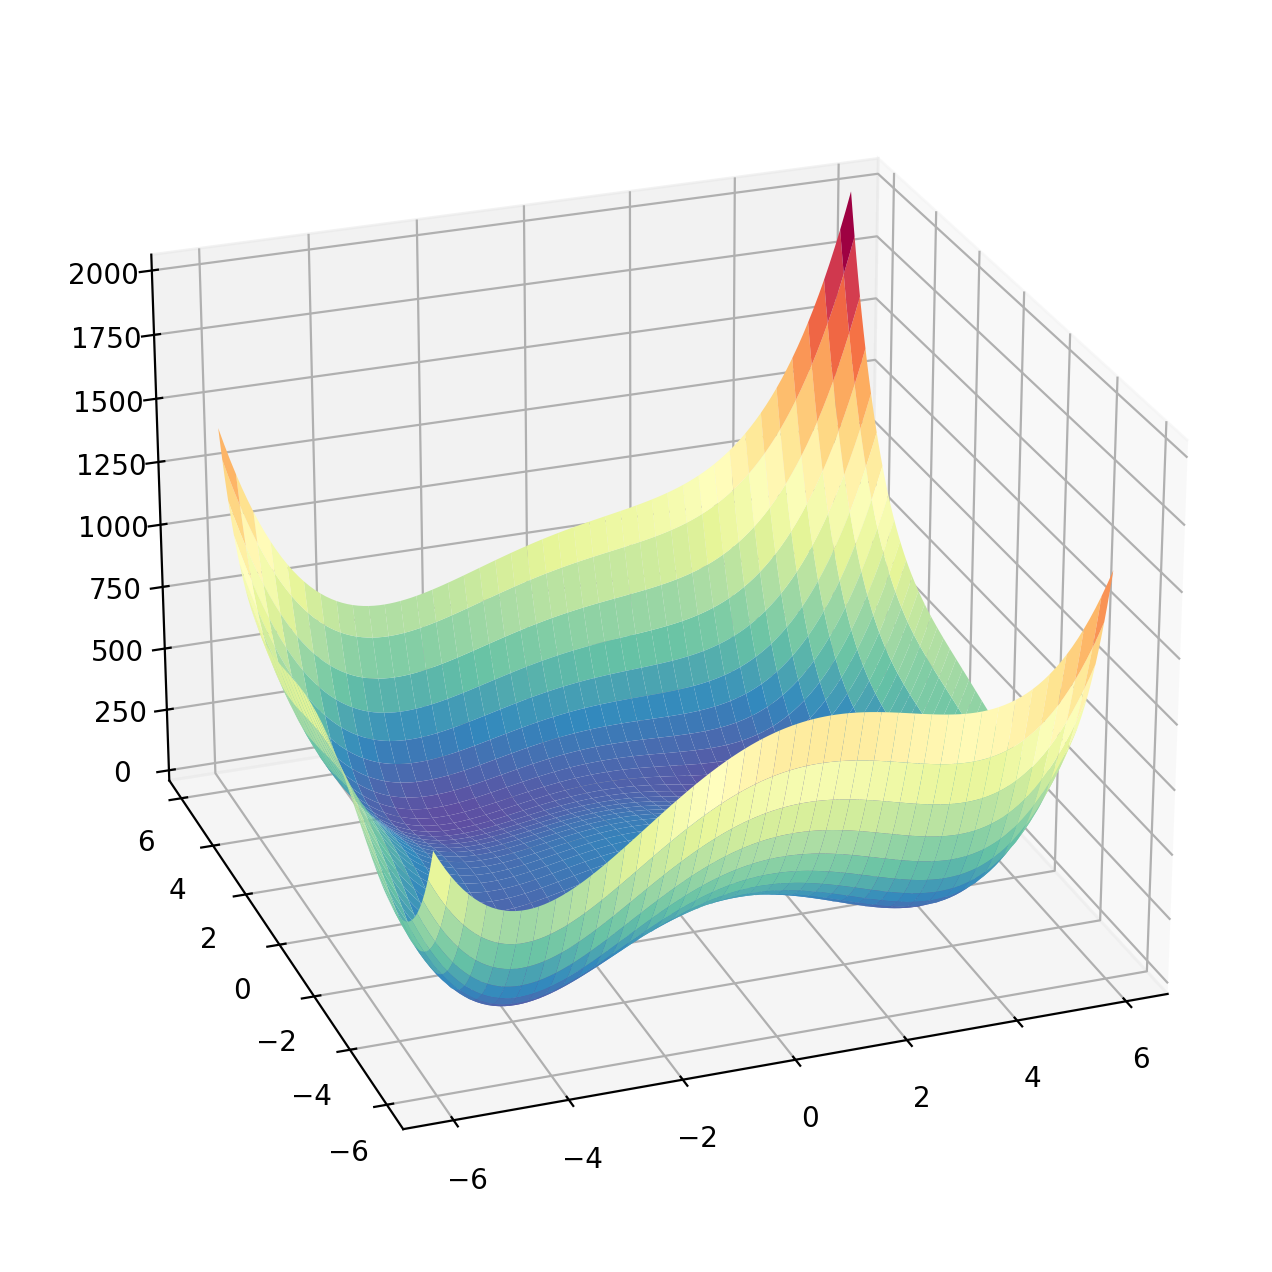

In [3]:
# define range for input
r_min, r_max = -6.0, 6.0
# sample input range uniformly at 0.1 increments
xaxis = np.arange(r_min, r_max, 0.1)
yaxis = np.arange(r_min, r_max, 0.1)
# create a mesh from the axis
X = np.meshgrid(xaxis, yaxis)
# compute targets
results = himmelblau(X)
# create a surface plot with the jet color scheme
figure = plt.figure(figsize=(10,8))
axis = figure.add_subplot(projection='3d')
axis.plot_surface(X[0], X[1], results, cmap='Spectral_r')
axis.view_init(25,250)
# show the plot
plt.show()

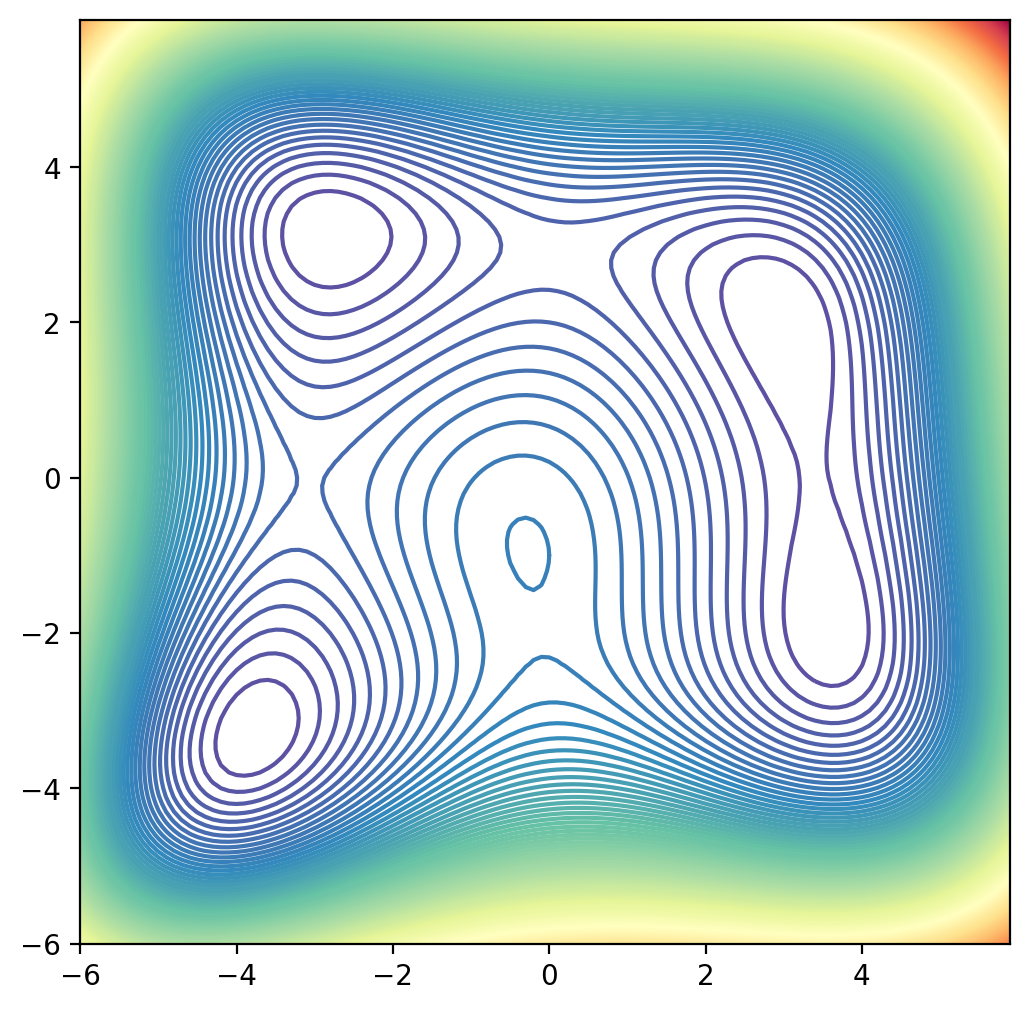

In [4]:
figure = plt.figure(figsize=(6,6))
plt.contour(X[0], X[1], results, 200, alpha=1.0, cmap='Spectral_r')
plt.show()

In [5]:
fig = go.Figure(data=[go.Surface(z=results, x=X[0], y=X[1],colorscale='Jet')])
fig.update_layout(title='Non-Convex Surface', autosize=True,
        scene = {
            "xaxis": {"nticks": 20},
            "zaxis": {"nticks": 4},
            'camera_eye': {"x": 0, "y": -1, "z": 0.5},
            "aspectratio": {"x": 1, "y": 1, "z": 0.75}})
fig.show()

In [6]:
def griewank(X):
    x1 = X[0]
    x2 = X[1]
    obj = 0.2 + x1**2 + x2**2 - 0.1*np.cos(6.0*3.1415*x1) - 0.1*np.cos(6.0*3.1415*x2)
    return obj

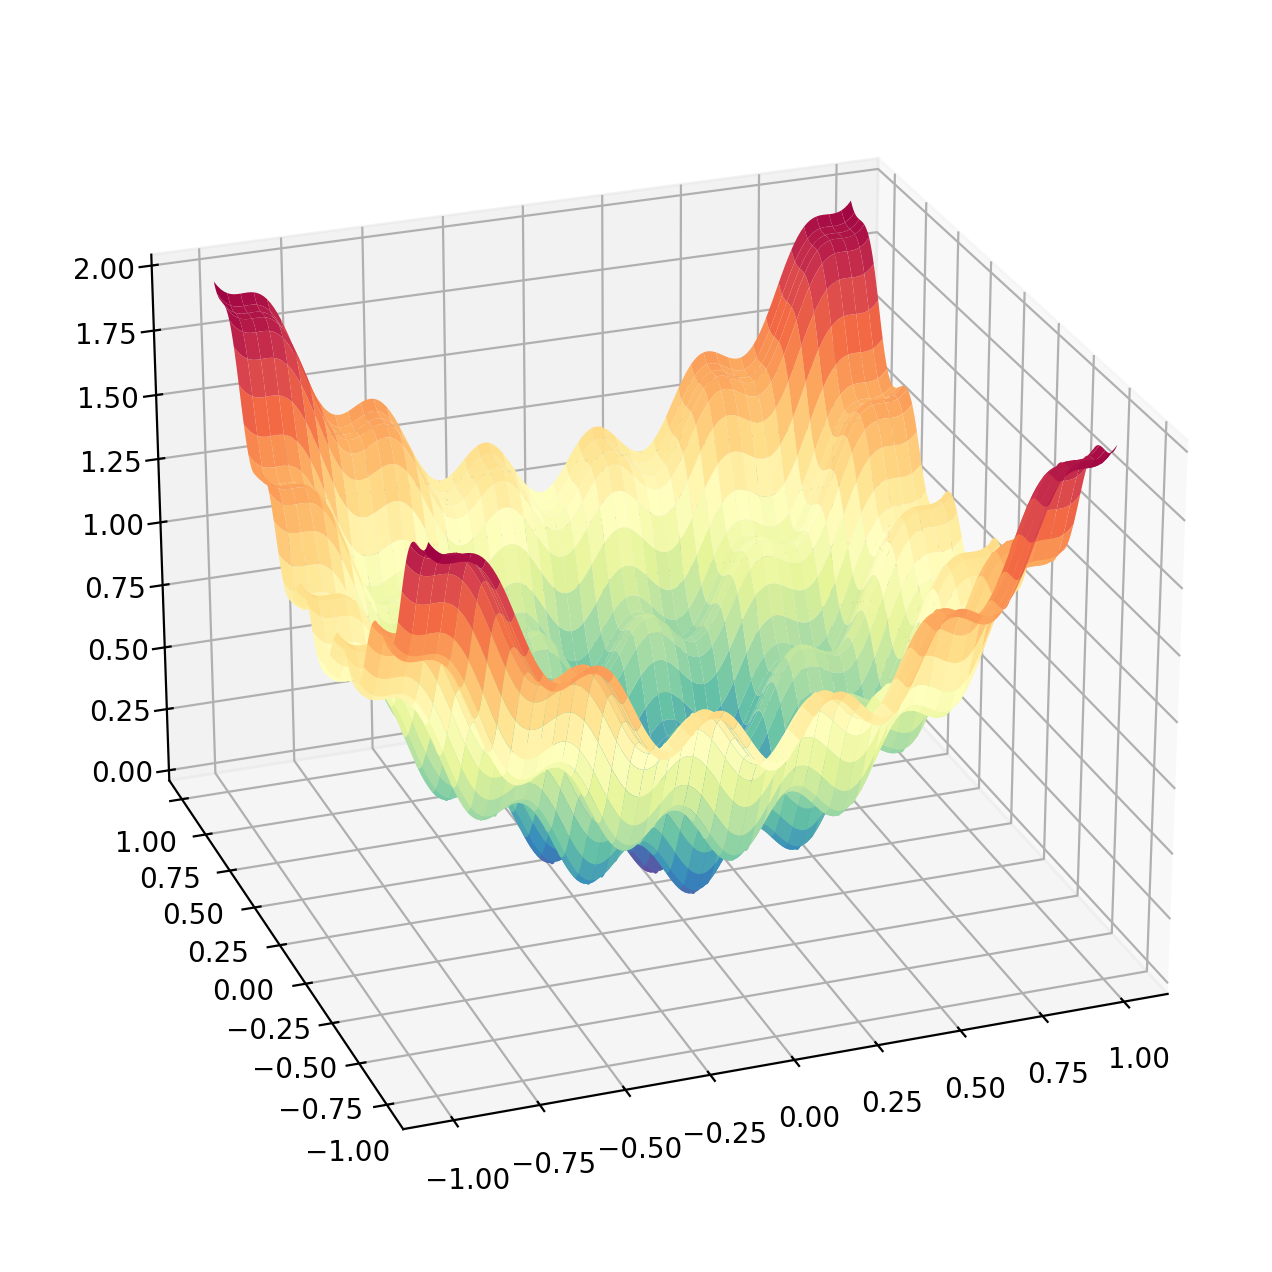

In [7]:
# define range for input
r_min, r_max = -1.0, 1.0
# sample input range uniformly at 0.1 increments
xaxis = np.arange(r_min, r_max, 0.01)
yaxis = np.arange(r_min, r_max, 0.01)
# create a mesh from the axis
X = np.meshgrid(xaxis, yaxis)
# compute targets
results = griewank(X)
# create a surface plot with the jet color scheme
figure = plt.figure(figsize=(10,8))
axis = figure.add_subplot(projection='3d')
axis.plot_surface(X[0], X[1], results, cmap='Spectral_r')
axis.view_init(25,250)
# show the plot
plt.show()

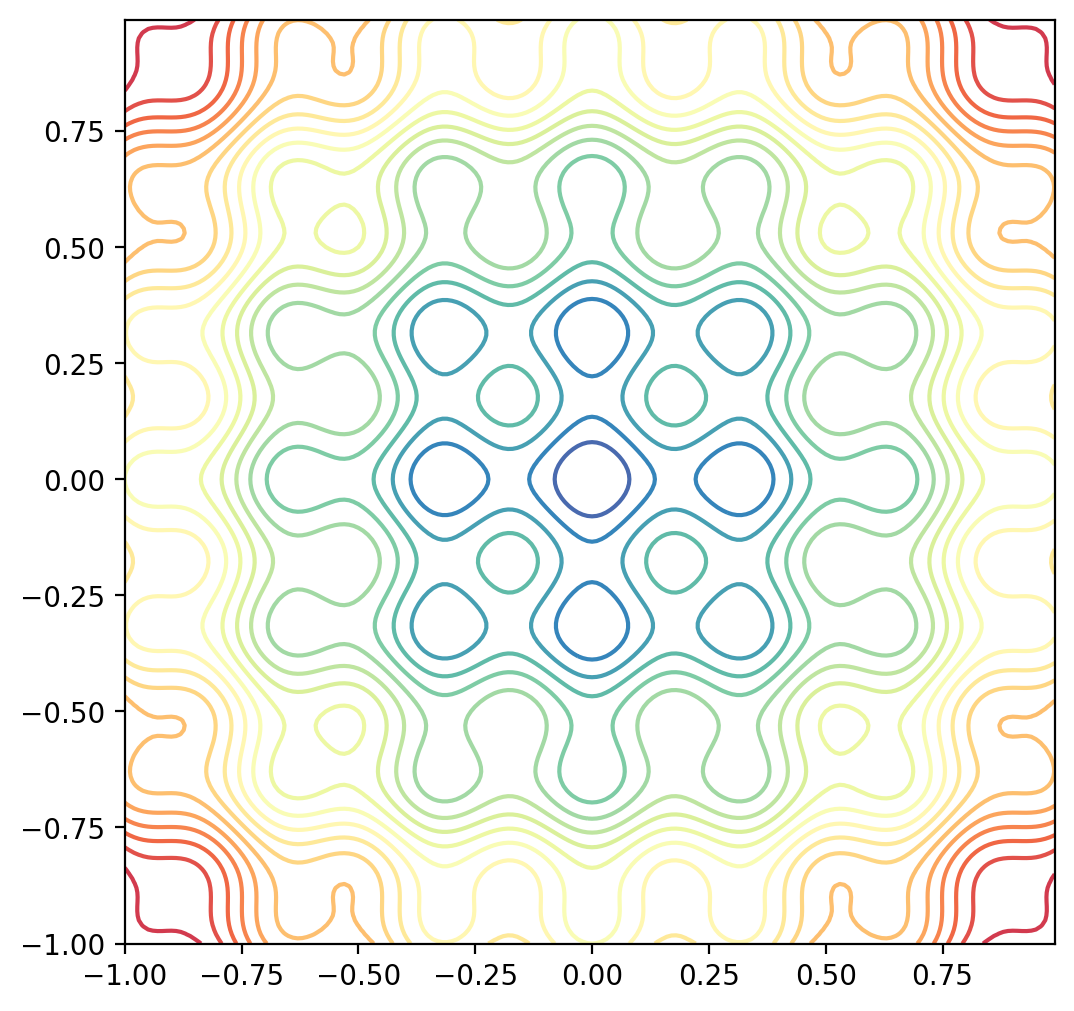

In [8]:
figure = plt.figure(figsize=(6,6))
plt.contour(X[0], X[1], results, 20, alpha=1.0, cmap='Spectral_r')
plt.show()

Text(0, 0.5, 'x2')

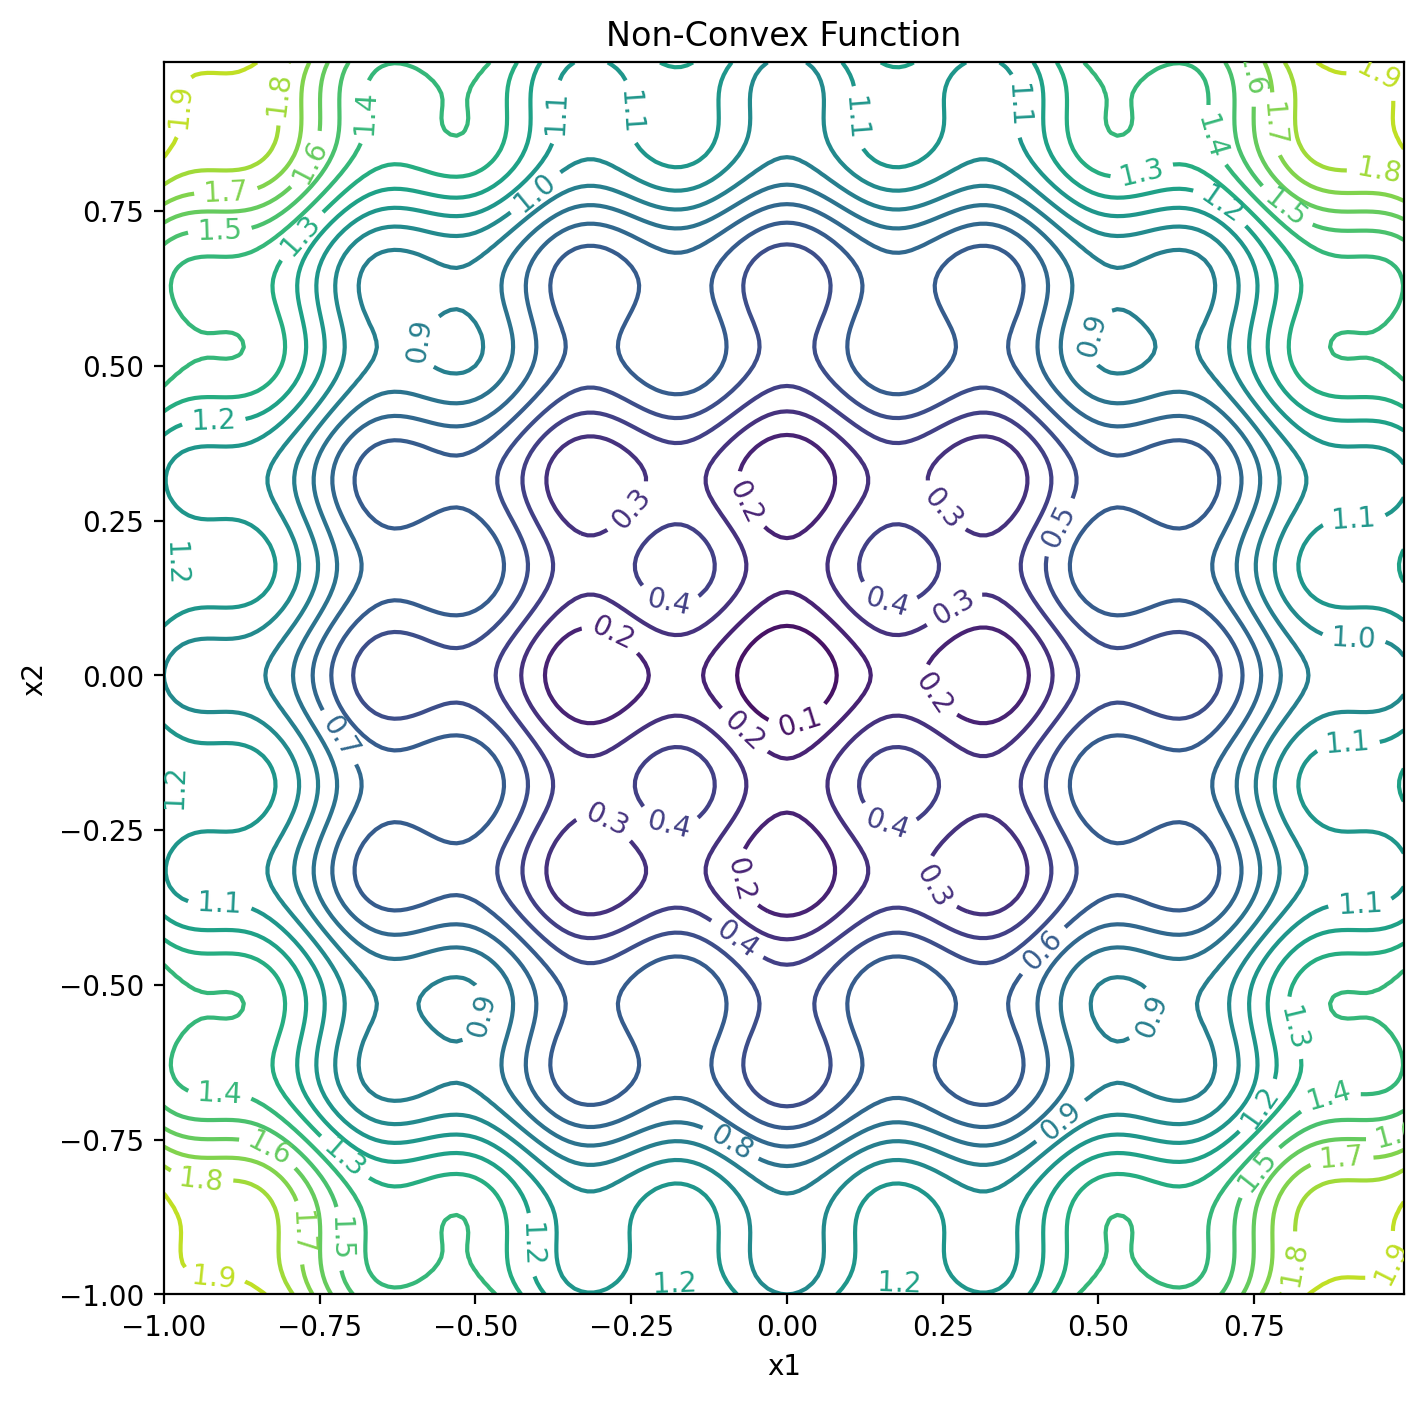

In [9]:
# Create a contour plot
plt.figure(figsize=(8,8))
# Specify contour lines
#lines = range(2,52,2)
# Plot contours
CS = plt.contour(X[0], X[1], results,20)#,lines)
# Label contours
plt.clabel(CS, inline=1, fontsize=10)
# Add some text to the plot
plt.title('Non-Convex Function')
plt.xlabel('x1')
plt.ylabel('x2')

In [10]:
fig = go.Figure(data=[go.Surface(z=results, x=X[0], y=X[1],colorscale='Jet')])
fig.update_layout(title='Non-Convex Surface', autosize=True,
        scene = {
            "xaxis": {"nticks": 20},
            "zaxis": {"nticks": 4},
            'camera_eye': {"x": 0, "y": -1, "z": 0.5},
            "aspectratio": {"x": 1, "y": 1, "z": 0.75}})
fig.show()

### PSO - Implementation Idea

Create a data structure (e.g., Python dictionary) that, for each particle, records the position, velocity and the particle's best position from the start.

In [11]:
# PSO algorithm

def particle_swarm_optimization(obj_function, num_dimensions, num_particles, max_iter,i_min=-10,i_max=10,bounds=None,w=0.5,c1=0.3,c2=0.6):
    # Initialize the particles
    # This creates a data structure such as a dictionary
    # very important: initiate a tracker variables
    if bounds is None:
        particles = [({'position': [np.random.uniform(i_min, i_max) for _ in range(num_dimensions)],
                    'velocity': [np.random.uniform(-1, 1) for _ in range(num_dimensions)],
                    'pbest': float('inf'),
                    'pbest_position': None})
                    for _ in range(num_particles)]
    else:
        particles = [({'position': [np.random.uniform(bounds[i][0], bounds[i][1]) for i in range(num_dimensions)],
                    'velocity': [np.random.uniform(-1, 1) for _ in range(num_dimensions)],
                    'pbest': float('inf'),
                    'pbest_position': None})
                    for _ in range(num_particles)]

    # Initialize global best
    gbest_value = float('inf')
    gbest_position = None

    for _ in range(max_iter):
        for particle in particles:
            position = particle['position']
            velocity = particle['velocity']

            # Calculate the current value
            current_value = obj_function(position)

            # Update personal best
            if current_value < particle['pbest']:
                particle['pbest'] = current_value
                particle['pbest_position'] = position.copy()

            # Update global best
            if current_value < gbest_value:
                gbest_value = current_value
                gbest_position = position.copy()

            # Update particle's velocity and position
            for i in range(num_dimensions):
                r1, r2 = np.random.uniform(), np.random.uniform()
                # here below we have the equation from the slides
                velocity[i] = w * velocity[i] + c1*r1 * (particle['pbest_position'][i] - position[i]) + c2*r2 * (gbest_position[i] - position[i])
                position[i] += velocity[i]
                # legalize the values to the provided bounds
                if bounds is not None:
                    position[i] = np.clip(position[i],bounds[i][0],bounds[i][1])

    return gbest_position, gbest_value

In [13]:
# Parameters
num_dimensions = 2
num_particles = 5
max_iter = 5000
bounds = [(-10, 10), (-12, 12)]

# Run PSO
best_position, best_value = particle_swarm_optimization(griewank,num_dimensions, num_particles, max_iter,bounds=bounds,w=0.4,c1=0.5,c2=0.8)
print("Best Position:", best_position)
print("Best Value:", best_value)

Best Position: [np.float64(-4.124902953278452e-08), np.float64(-1.9095494765001315e-08)]
Best Value: 3.8746783559417963e-14


### How about finding hyper-parameters for Elastic-Net?

Below is an example of an objective function that can be used with Particle Swarm Optimization to find the best values of alpha and l1_ratio.

In [ ]:
def obj_function(hyper):
    alpha = hyper[0]
    l1_ratio = hyper[1]
    model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
    kf = KFold(n_splits=10,shuffle=True,random_state=123)
    scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')
    return -np.mean(scores)

## <font color='navy' size=6pt> Simulated Annealing</font>

**Main Idea**: drop a random trial point and then, based on the value of the objective function, continue to drop other points at a certain distance. The distance between consecutive points is measured as a function of the "temperature" which is decreasing based on an exponential law.

**Important** This method use only one point at a time. The temperature of the grid is deacreasing, such as $T_{i+1}=rT_{i}$ where $0<r<1.$ The probability that the system will transition from state $e_i$ to state $e_{i+1}$ is

$$\text{P}(e_{i+1}\text{at temperature } T_i)=\begin{cases} e^{-(\text{New Loss} - \text{Loss})/T_i} &\text{if}& \text{New Loss}\, > \,\text{Loss}\\
1 &\text{if}& \text{New Loss}\, \leq \,\text{Loss}\end{cases} $$

Decision to continue: if
$$ \text{P}(e_{i+1}\text{at temperature } T_i)>\chi\,\, \text{where}\,\, \chi \sim \text{Unif}(0,1).$$

Formal steps:

- Let $s=s_0$ where $s_0$ is a random guess.
- An iterator $k$ is decreasing from $k_{max}$ to $0.$
- Set $T←\text{temperature}((k+1)/k_{max})$
- Pick a random neighbor, $s_{new}←\text{neighbor}(s)$
- If $\text{P}(s_{new},T)>\text{random}(0,1)$ then $s→s_{new}$
Output: the final state $s$



Visual example for simulated annealing algorithm: https://www.youtube.com/watch?v=iaq_Fpr4KZc

## <font color='navy' size = 6pt> Example with GridsearchCV and Simulated Annealing

In [15]:
data = pd.read_csv('https://github.com/dvasiliu/AML/blob/main/Data%20Sets/housing.csv?raw=true')

In [17]:
data

town  tract  longitude   latitude    crime  residential  \
0        Nahant   2011 -70.955002  42.255001  0.00632         18.0   
1    Swampscott   2021 -70.949997  42.287498  0.02731          0.0   
2    Swampscott   2022 -70.935997  42.283001  0.02729          0.0   
3    Marblehead   2031 -70.928001  42.292999  0.03237          0.0   
4    Marblehead   2032 -70.921997  42.298000  0.06905          0.0   
..          ...    ...        ...        ...      ...          ...   
501    Winthrop   1801 -70.986000  42.231201  0.06263          0.0   
502    Winthrop   1802 -70.990997  42.227501  0.04527          0.0   
503    Winthrop   1803 -70.994797  42.226002  0.06076          0.0   
504    Winthrop   1804 -70.987503  42.223999  0.10959          0.0   
505    Winthrop   1805 -70.982498  42.221001  0.04741          0.0   

     industrial river    nox  rooms      older  distance  highway  tax  \
0          2.31    no  0.538  6.575  65.199997    4.0900        1  296   
1          7.07    no  0.469  6.421  78.900002    4.9671        2  242   
2          7.07    no  0.469  7.185  61.099998    4.9671        2  242   
3          2.18    no  0.458  6.998  45.799999    6.0622        3  222   
4          2.18    no  0.458  7.147  54.200001    6.0622        3  222   
..          ...   ...    ...    ...        ...       ...      ...  ...   
501       11.93    no  0.573  6.593  69.099998    2.4786        1  273   
502       11.93    no  0.573  6.120  76.699997    2.2875        1  273   
503       11.93    no  0.573  6.976  91.000000    2.1675        1  273   
504       11.93    no  0.573  6.794  89.300003    2.3889        1  273   
505       11.93    no  0.573  6.030  80.800003    2.5050        1  273   

       ptratio  lstat      cmedv  
0    15.300000   4.98  24.000000  
1    17.799999   9.14  21.600000  
2    17.799999   4.03  34.700001  
3    18.700001   2.94  33.400002  
4    18.700001   5.33  36.200001  
..         ...    ...        ...  
501  21.000000   9.67  22.400000  
502  21.000000   9.08  20.600000  
503  21.000000   5.64  23.900000  
504  21.000000   6.48  22.000000  
505  21.000000   7.88  19.000000  

[506 rows x 17 columns]

In [ ]:
data.drop('river',axis=1)

town  tract  longitude   latitude    crime  residential  \
0        Nahant   2011 -70.955002  42.255001  0.00632         18.0   
1    Swampscott   2021 -70.949997  42.287498  0.02731          0.0   
2    Swampscott   2022 -70.935997  42.283001  0.02729          0.0   
3    Marblehead   2031 -70.928001  42.292999  0.03237          0.0   
4    Marblehead   2032 -70.921997  42.298000  0.06905          0.0   
..          ...    ...        ...        ...      ...          ...   
501    Winthrop   1801 -70.986000  42.231201  0.06263          0.0   
502    Winthrop   1802 -70.990997  42.227501  0.04527          0.0   
503    Winthrop   1803 -70.994797  42.226002  0.06076          0.0   
504    Winthrop   1804 -70.987503  42.223999  0.10959          0.0   
505    Winthrop   1805 -70.982498  42.221001  0.04741          0.0   

     industrial    nox  rooms      older  distance  highway  tax    ptratio  \
0          2.31  0.538  6.575  65.199997    4.0900        1  296  15.300000   
1          7.07  0.469  6.421  78.900002    4.9671        2  242  17.799999   
2          7.07  0.469  7.185  61.099998    4.9671        2  242  17.799999   
3          2.18  0.458  6.998  45.799999    6.0622        3  222  18.700001   
4          2.18  0.458  7.147  54.200001    6.0622        3  222  18.700001   
..          ...    ...    ...        ...       ...      ...  ...        ...   
501       11.93  0.573  6.593  69.099998    2.4786        1  273  21.000000   
502       11.93  0.573  6.120  76.699997    2.2875        1  273  21.000000   
503       11.93  0.573  6.976  91.000000    2.1675        1  273  21.000000   
504       11.93  0.573  6.794  89.300003    2.3889        1  273  21.000000   
505       11.93  0.573  6.030  80.800003    2.5050        1  273  21.000000   

     lstat      cmedv  
0     4.98  24.000000  
1     9.14  21.600000  
2     4.03  34.700001  
3     2.94  33.400002  
4     5.33  36.200001  
..     ...        ...  
501   9.67  22.400000  
502   9.08  20.600000  
503   5.64  23.900000  
504   6.48  22.000000  
505   7.88  19.000000  

[506 rows x 16 columns]

In [ ]:
x = data.drop('river',axis=1).loc[:,'crime':'lstat'].values
y = data['cmedv'].values

In [ ]:
mypipe = Pipeline(steps=[('scale',StandardScaler()),('lasso',Lasso(max_iter=10000))])

In [ ]:
%%time
params = {'lasso__alpha':np.linspace(0.001,2,num=4000)}
gs = GridSearchCV(estimator=mypipe,cv=10,scoring='neg_mean_squared_error',param_grid=params)
gs_results = gs.fit(x,y)
print(gs_results.best_params_)
print('The external validity is: ', np.abs(gs_results.best_score_))

{'lasso__alpha': 0.0949764941235309}
The external validity is:  33.474901655901235
CPU times: user 1min 48s, sys: 301 ms, total: 1min 49s
Wall time: 1min 54s


In [ ]:
%%time
model = ElasticNet(max_iter=10000)
params = [{'alpha':np.linspace(0.001,2,num=1000),'l1_ratio':np.linspace(0.001,1,num=1000)}]
gs = GridSearchCV(estimator=model,cv=10,scoring='neg_mean_squared_error',param_grid=params)
gs_results = gs.fit(x,y)
print(gs_results.best_params_)
print('The mean square error is: ', np.abs(gs_results.best_score_))

In [ ]:
print(gs_results.best_params_)
print('The mean square error is: ', np.abs(gs_results.best_score_))

{'alpha': 1.0, 'l1_ratio': 0.0}
The mean square error is:  64.57677655644844


In [ ]:
gs_results

## Example of Simulated Annealing in 1D

ATTENTION: The following example of simulated annealing only works if you have one hyperparameter. If you have two or more you would have to implement sensible changes to make it work.

In [1]:
# Here we have a simple implementation of Simmulated Annealing in One Dimension
MIN_ALPHA = 0.0001
MAX_ALPHA = 2
STEP_SIZE = 1     # Std of gaussian steps
COOLING = 0.98    # T_{n+1} = T_{n}*COOLING, i.e. geometric cooling

In [ ]:
scale = StandardScaler()

In [ ]:
pipe = Pipeline([['Scale',scale],['Model',model]])

In [ ]:
def cost_function(model):
    pipe = Pipeline([['Scale',scale],['Model',model]])
    k_fold = cross_val_score(estimator=pipe,X=x,y=y,cv=10,scoring='neg_mean_squared_error')
    return -k_fold.mean()
def random_start():
    alpha = np.random.random()*(MAX_ALPHA-MIN_ALPHA) + MIN_ALPHA
    return alpha
def random_neighbour(alpha,T):
    delta_alpha = np.random.normal()*STEP_SIZE*T
    new_alpha = min(MAX_ALPHA, max(MIN_ALPHA, alpha+delta_alpha))
    return new_alpha
def acceptance_probability(cost, new_cost, temperature):
    if new_cost < cost:
        return 1
    else:
        p = np.exp(-(new_cost - cost) / temperature)
        return p
def locate_min(a):
    smallest = min(a)
    return smallest, [index for index, element in enumerate(a) if smallfrom sklearn.metrics import crossvalscoreest == element]

def annealing(alpha0 = random_start()):
    # Start with a random configuration
    # alpha = random_start()
    alpha = alpha0
    # All layers will have the same number of nodes (keep the example from getting too complicated)
    model = Lasso(alpha=alpha,max_iter=10000)

    # Compute the cost function (in this case, 1-accuracy)
    cost = cost_function(model)

    # Keep lists of results, start with the current
    states, costs = [alpha], [cost]
    T = 1
    while T > 1e-10:
        new_alpha = random_neighbour(alpha,T)
        model = Lasso(random_state=1234, alpha=new_alpha)
        new_cost = cost_function(model)
        if acceptance_probability(cost, new_cost, T) > np.random.random():
            cost = new_cost
            alpha = new_alpha
            states.append(alpha)
            costs.append(cost)
        T = T*COOLING
    return model,states,costs

Lowest cost function value: 33.474898179732634
Best alpha value(s):
[0.0951833872295944]


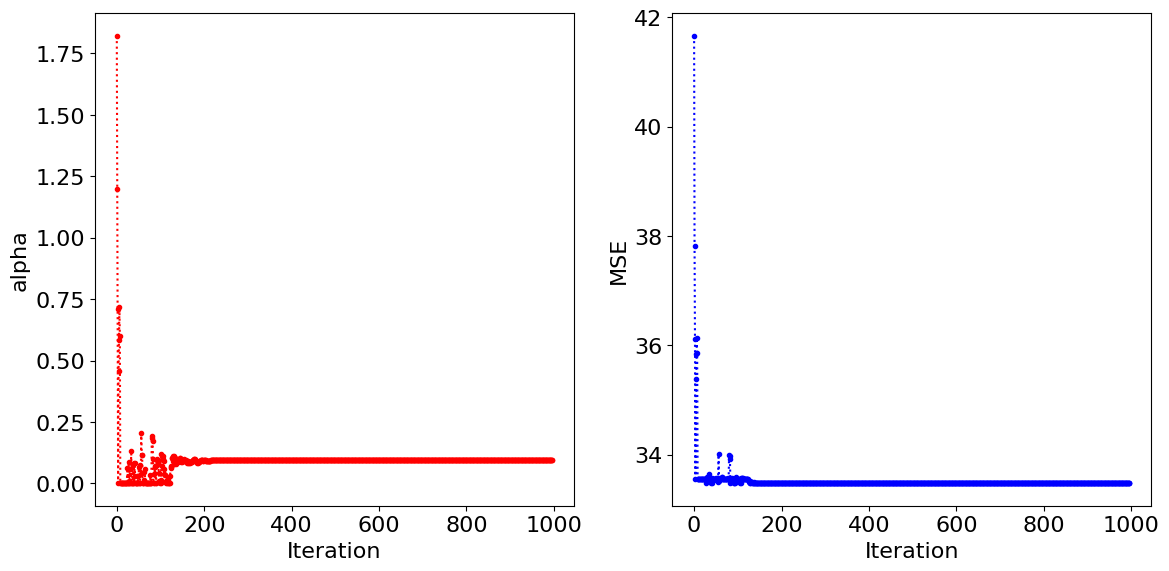

CPU times: user 36.7 s, sys: 220 ms, total: 37 s
Wall time: 37.3 s


In [ ]:
%%time
model,states,costs = annealing()

lowest_cost, best_states = locate_min(costs)
print('Lowest cost function value: ' + str(lowest_cost))
print('Best alpha value(s):')
print([states[idx] for idx in best_states])

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(states,':.r')
plt.xlabel('Iteration')
plt.ylabel('alpha')
plt.subplot(1,2,2)
plt.plot(costs,':.b')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.tight_layout()
plt.show()

Text(0, 0.5, 'MSE')

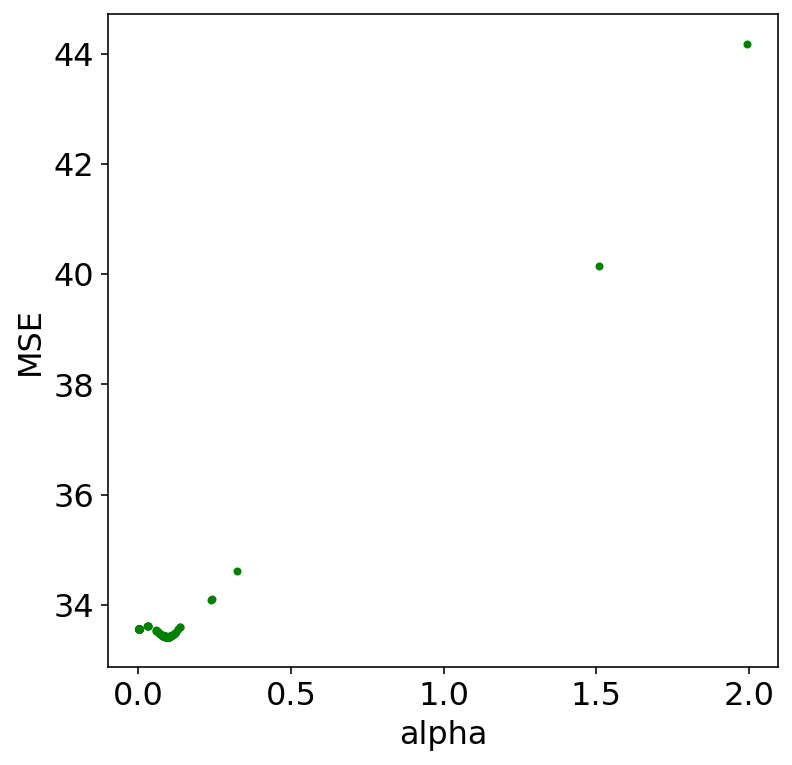

In [ ]:
plt.figure(figsize=(6,6))
plt.plot(states,costs,'.g')
plt.xlabel('alpha')
plt.ylabel('MSE')

### Example of Simulated Annealing for any number of dimensions

In [ ]:

# Objective function for n-dimensional grid
def objective_function_nd(x):
    # Example objective function; replace with your specific function
    return sum(xi**2 for xi in x)

# Generate a random candidate solution near the current solution for n dimensions
def get_candidate_solution_nd(current_solution, bounds,temp):
    return [np.clip(xi + np.random.normal() * (bounds[i][1] - bounds[i][0]) * temp,bounds[i][0],bounds[i][1]) for i, xi in enumerate(current_solution)]

# Simulated Annealing algorithm for n dimensions with different bounds
def simulated_annealing_nd(objective, bounds, max_iterations, initial_temp, cooling_rate, dimensions):
    # Initialize with a random solution within the specific bounds for each dimension
    current_solution = [np.random.uniform(bounds[i][0], bounds[i][1]) for i in range(dimensions)]
    current_solution_cost = objective(current_solution)
    best_solution = current_solution[:]
    best_solution_cost = current_solution_cost

    # Current temperature
    temp = initial_temp

    for iteration in range(max_iterations):
        # Get a candidate solution respecting individual dimension bounds
        candidate_solution = get_candidate_solution_nd(current_solution, bounds,temp)
        candidate_solution_cost = objective(candidate_solution)

        # Check if the candidate solution is better
        if candidate_solution_cost < current_solution_cost:
            current_solution, current_solution_cost = candidate_solution, candidate_solution_cost
            if candidate_solution_cost < best_solution_cost:
                best_solution, best_solution_cost = candidate_solution, candidate_solution_cost
        else:
            # Accept worse solutions with a certain probability
            if np.random.uniform(0, 1) < np.exp((current_solution_cost - candidate_solution_cost) / temp):
                current_solution, current_solution_cost = candidate_solution, candidate_solution_cost

        # Decrease the temperature
        temp *= cooling_rate

        # Optional: Output some information
        if (iteration+1) % 500 == 0:
            print(f"Iteration {iteration+1}, Temperature: {temp:.2f}, Current Solution: {current_solution}, Current Cost: {current_solution_cost}")

    return best_solution, best_solution_cost


# Define parameters
bounds = [(-10, 10), (-20, 20), (-5, 5)]  # Individual bounds for each dimension
dimensions = len(bounds)  # Number of dimensions based on bounds
max_iterations = 2500  # Maximum number of iterations
initial_temp = 100  # Initial temperature
cooling_rate = 0.99  # Cooling rate

# Run the algorithm for n dimensions with different bounds
best_solution_nd, best_solution_cost_nd = simulated_annealing_nd(
    objective_function_nd, bounds, max_iterations, initial_temp, cooling_rate, dimensions
)
print(f"Best solution in {dimensions}D with different bounds: {best_solution_nd}, Best cost: {best_solution_cost_nd}")